In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
style.use("ggplot")
import missingno as msno
from sklearn.cluster import KMeans
from sklearn.cluster import MeanShift
from sklearn.datasets import make_blobs
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
import kaggle
from kaggle.api.kaggle_api_extended import KaggleApi
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.decomposition import PCA
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import mutual_info_regression

# Set Matplotlib defaults
plt.style.use("seaborn-whitegrid")
plt.rc("figure", autolayout=True)
plt.rc(
    "axes",
    labelweight="bold",
    labelsize="large",
    titleweight="bold",
    titlesize=14,
    titlepad=10,
)

api = KaggleApi()
api.authenticate()

train_data = pd.read_csv("Train.csv")
test_data = pd.read_csv("Test.csv")

In [ ]:
test_data.shape

In [9]:
def make_mi_scores(X, y):
    X = X.copy()
    for colname in X.select_dtypes(["object", "category"]):
        X[colname], _ = X[colname].factorize()
    # All discrete features should now have integer dtypes
    for colname in X.select_dtypes("float64"):
        X[colname] = X[colname].astype("int64")
    discrete_features = [pd.api.types.is_integer_dtype(t) for t in X.dtypes]
    mi_scores = mutual_info_regression(X, y, random_state=0)
    mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)
    mi_scores = mi_scores.sort_values(ascending=False)
    return mi_scores

def plot_mi_scores(scores):
    scores = scores.sort_values(ascending=True)
    width = np.arange(len(scores))
    ticks = list(scores.index)
    plt.barh(width, scores)
    plt.yticks(width, ticks)
    plt.title("Mutual Information Scores")

In [7]:
X = train.copy()
y = X.pop('regency_cluster')

msno.matrix(X)

,Unnamed: 0,time_date,site,continent_id,buyer_country,buyer_region,buyer_city,distance,buyer_id,mobile,...,adults,children,room,destination_id,destination_type,dealing,regency_continent,regency_country,regency_market,cnt
0,0,8/11/2014 7:46,2,3,66,348,48862,2234.2641,12,0,...,2,0,1,8250,1,0,3,2,50,628
1,1,8/11/2014 8:22,2,3,66,348,48862,2234.2641,12,0,...,2,0,1,8250,1,1,1,2,50,628
2,2,8/11/2014 8:24,2,3,66,348,48862,2234.2641,12,0,...,2,0,1,8250,1,0,1,2,50,628
3,3,8/9/2014 18:05,2,3,66,442,35390,913.1932,93,0,...,2,0,1,14984,1,0,1,2,50,1457
4,4,8/9/2014 18:08,2,3,66,442,35390,913.6259,93,0,...,2,0,1,14984,1,0,1,2,50,1457


<AxesSubplot:>

c:\users\san-z30\appdata\local\programs\python\python39\lib\site-packages\IPython\core\pylabtools.py:134: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.print_figure(bytes_io, **kw)


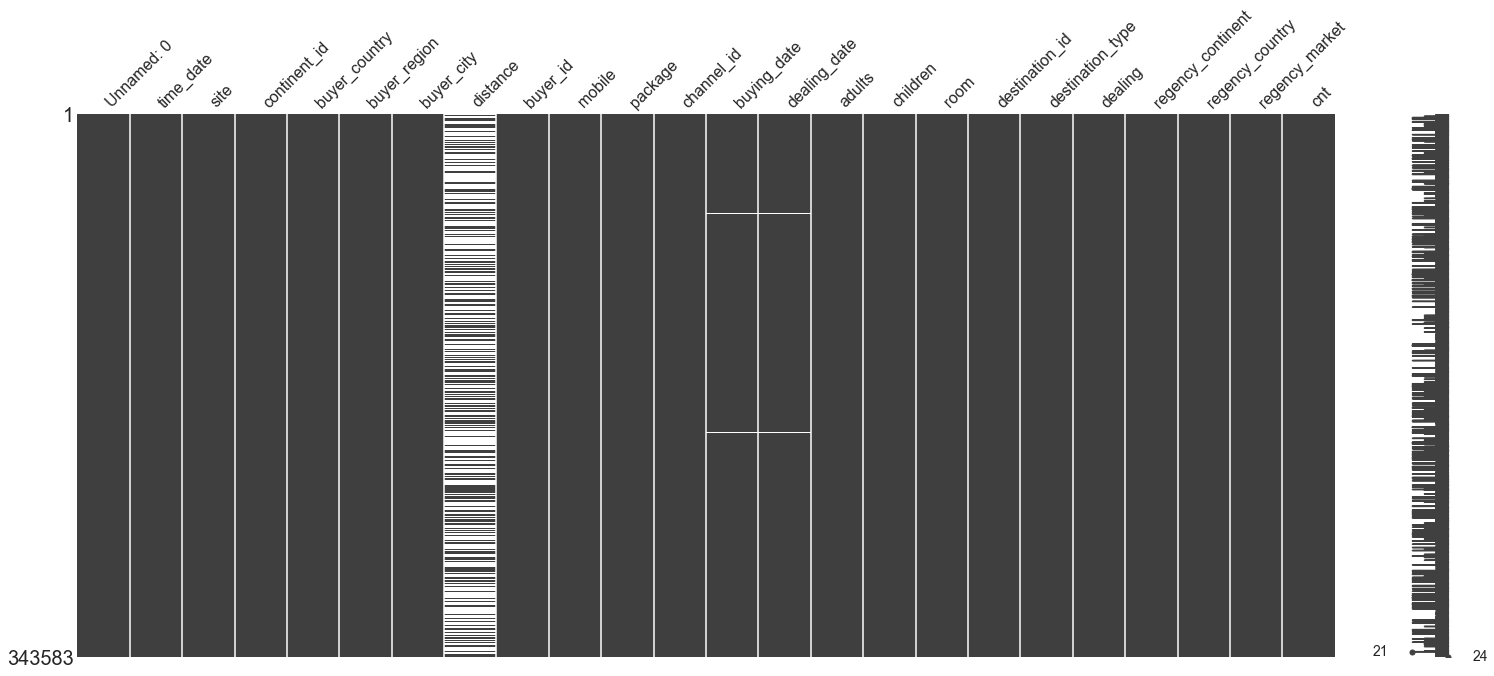

In [4]:
msno.matrix(X)

In [3]:
X.shape

(343583, 24)

In [11]:
cols_with_missing = [col for col in X.columns 
                     if X[col].isna().any()]
X = X.drop(cols_with_missing, axis = 1)

In [5]:
X.shape

(343583, 21)

<AxesSubplot:>

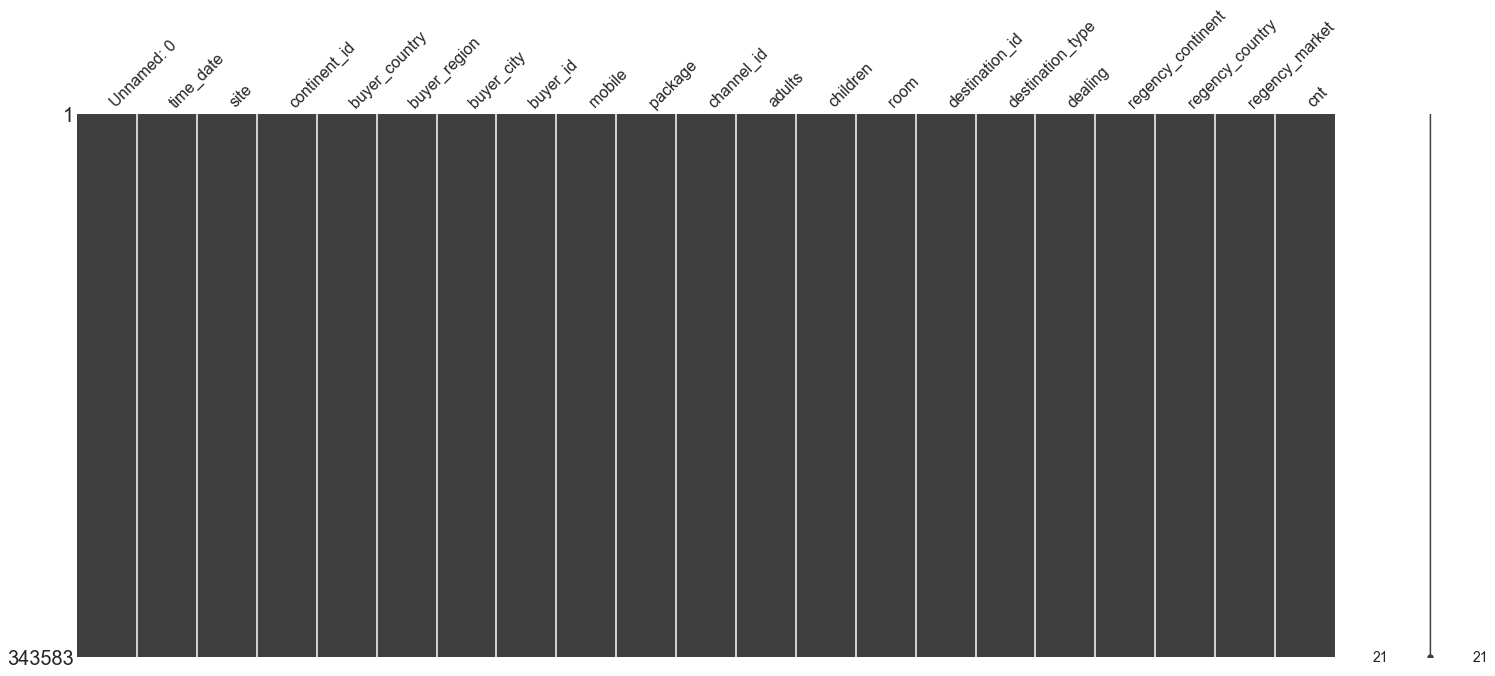

In [8]:
msno.matrix(X)

In [12]:
mi_scores = make_mi_scores(X, y)

In [13]:
X.dtypes

Unnamed: 0            int64
time_date            object
site                  int64
continent_id          int64
buyer_country         int64
buyer_region          int64
buyer_city            int64
buyer_id              int64
mobile                int64
package               int64
channel_id            int64
adults                int64
children              int64
room                  int64
destination_id        int64
destination_type      int64
dealing               int64
regency_continent     int64
regency_country       int64
regency_market        int64
cnt                   int64
dtype: object

In [43]:
y.max()

99

<AxesSubplot:>

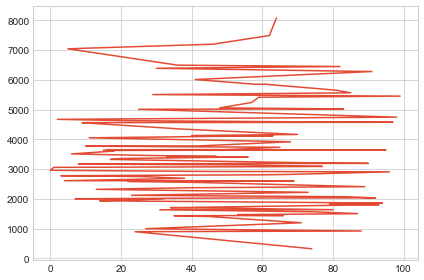

In [39]:
y.value_counts().sort_values().plot()

regency_market       0.205995
regency_country      0.188343
cnt                  0.141000
continent_id         0.103643
site                 0.081233
buyer_country        0.061355
destination_id       0.042209
buyer_region         0.032537
package              0.028895
destination_type     0.026160
adults               0.021608
children             0.011587
buyer_id             0.010707
channel_id           0.007131
buyer_city           0.007063
dealing              0.005183
room                 0.004385
time_date            0.003832
regency_continent    0.002830
mobile               0.000000
Name: MI Scores, dtype: float64


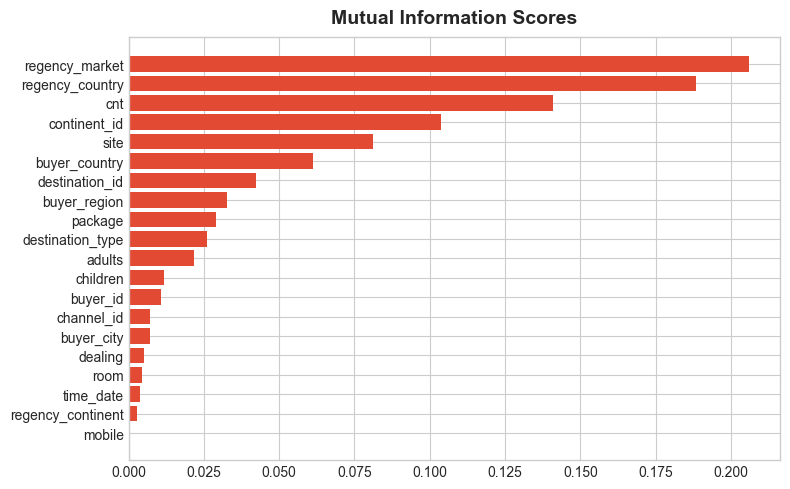

In [10]:
print(mi_scores.head(20))

plt.figure(dpi=100, figsize=(8, 5))
plot_mi_scores(mi_scores.head(20))

In [ ]:
feature = "regency_market"

sns.lmplot(
    x=feature, y="regency_cluster", hue="buyer_region", col="buyer_region",
    data=train_data, scatter_kws={"edgecolor": 'w'}, col_wrap=3, height=4,
);